In [122]:
# Import All libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [123]:

# Load datasets
zd = pd.read_csv('zomato.csv',encoding='ISO-8859-1')


In [124]:
cc = pd.read_excel('Country-Code.xlsx')

In [125]:
zd.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [126]:
cc.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [127]:
zd.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [128]:
# Merge datasets on 'Country Code' to get country names
combined_data = pd.merge(zd, cc, on='Country Code', how='left')


In [129]:

# Separate numerical and categorical columns
numerical_columns = combined_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = combined_data.select_dtypes(include=['object']).columns

In [130]:
# Display first few rows of the combined dataset
print(combined_data.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [131]:
combined_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [132]:
# Check for missing values
print(combined_data.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64


In [133]:
# Drop irrelevant columns
#combined_data.drop(columns=['Restaurant ID', 'Address', 'Currency', 'Switch to order menu'], inplace=True)

In [134]:
# Explore data
combined_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


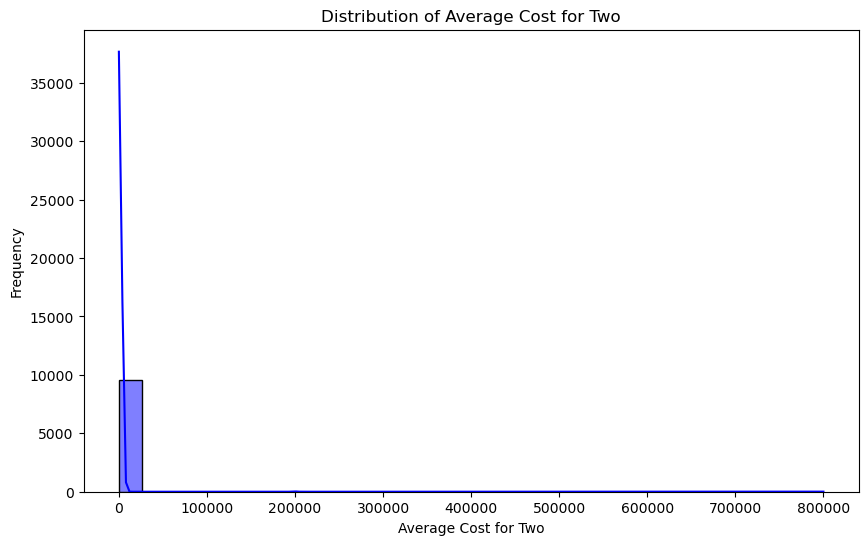

In [135]:
# Distribution of Average Cost for Two
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['Average Cost for two'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.show()


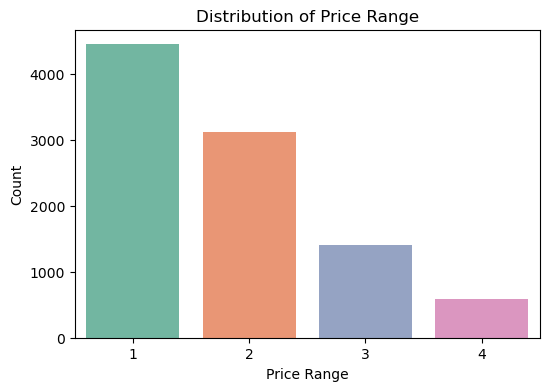

In [136]:
# Distribution of Price Range
plt.figure(figsize=(6, 4))
sns.countplot(x='Price range', data=combined_data, palette='Set2')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

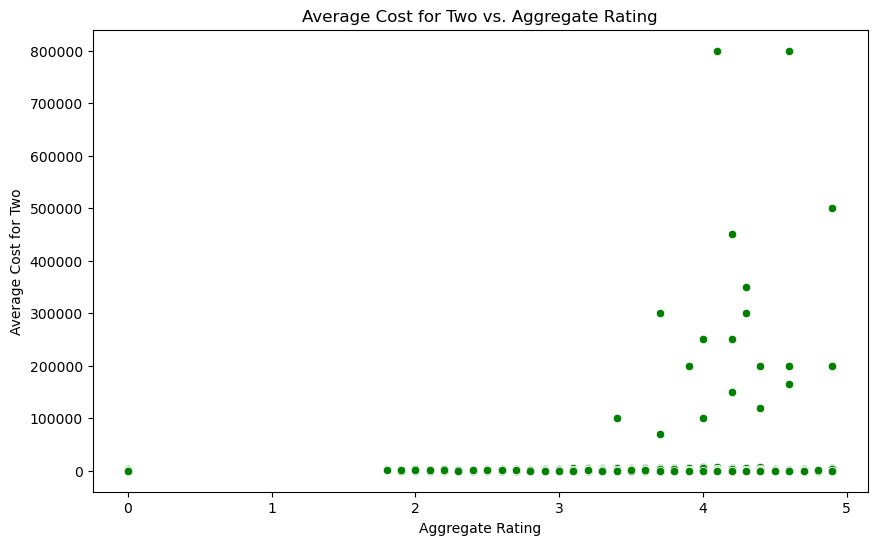

In [137]:
# Relationship between Aggregate Rating and Average Cost for Two
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aggregate rating', y='Average Cost for two', data=combined_data, color='green')
plt.title('Average Cost for Two vs. Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Cost for Two')
plt.show()


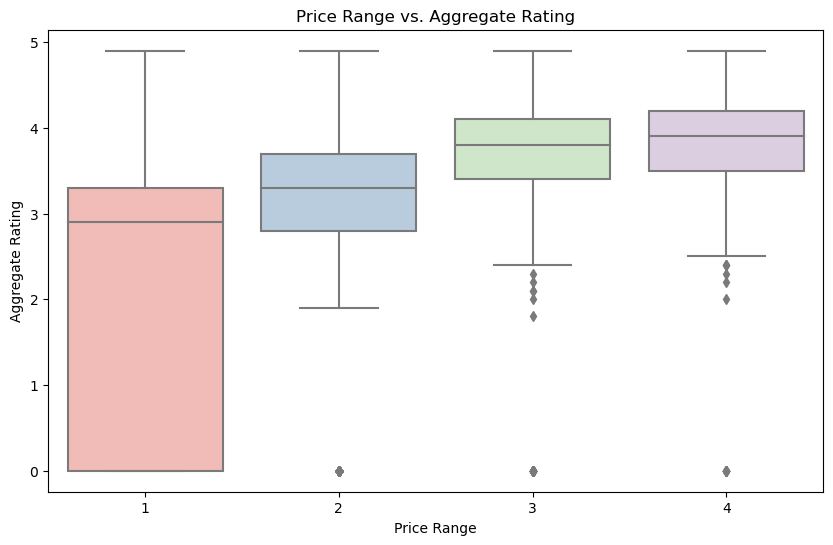

In [138]:
# Boxplot of Price Range vs. Aggregate Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=combined_data, palette='Pastel1')
plt.title('Price Range vs. Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

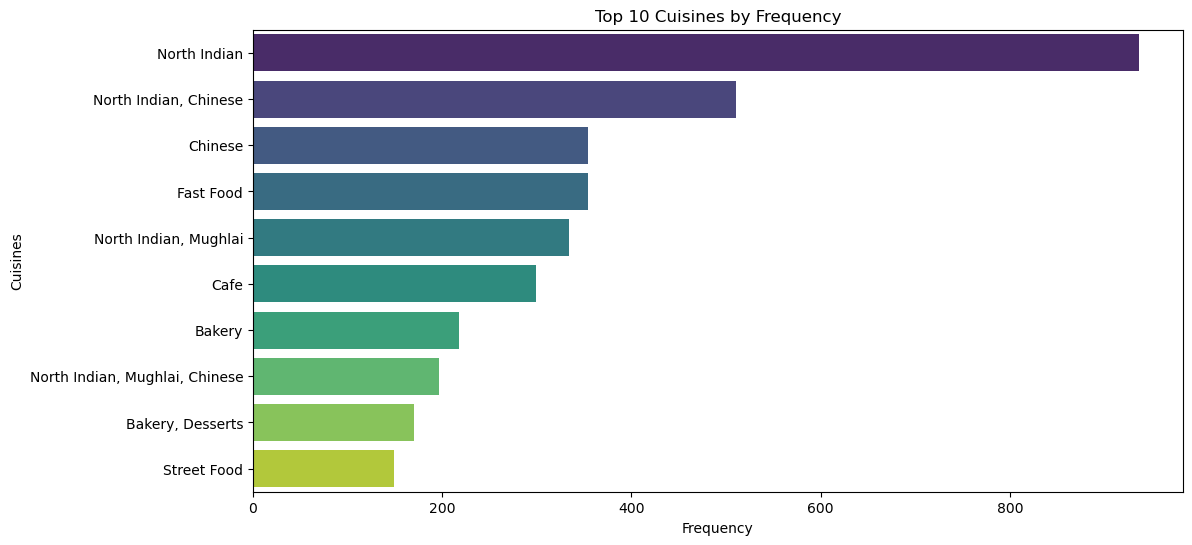

In [139]:
#Top Cuisines by Frequency:
plt.figure(figsize=(12, 6))
top_cuisines = combined_data['Cuisines'].value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Cuisines by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Cuisines')
plt.show()

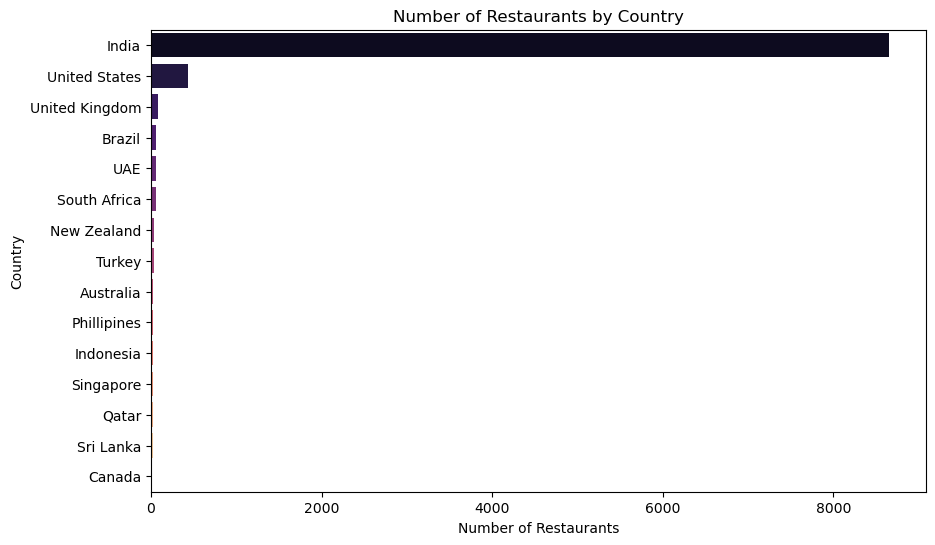

In [140]:
#`Restaurant Count by Country:
plt.figure(figsize=(10, 6))
country_restaurant_count = combined_data['Country'].value_counts()
sns.barplot(x=country_restaurant_count.values, y=country_restaurant_count.index, palette='magma')
plt.title('Number of Restaurants by Country')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country')
plt.show()

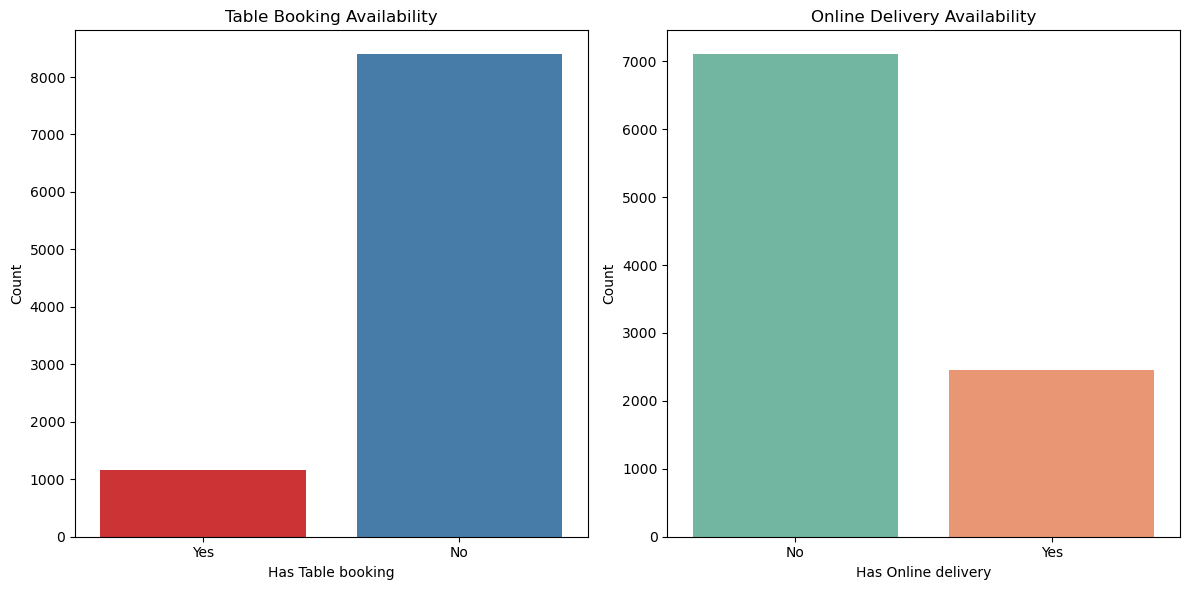

In [141]:
    #Table Booking and Online Delivery
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='Has Table booking', data=combined_data, ax=axes[0], palette='Set1')
axes[0].set_title('Table Booking Availability')
axes[0].set_xlabel('Has Table booking')
axes[0].set_ylabel('Count')

sns.countplot(x='Has Online delivery', data=combined_data, ax=axes[1], palette='Set2')
axes[1].set_title('Online Delivery Availability')
axes[1].set_xlabel('Has Online delivery')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

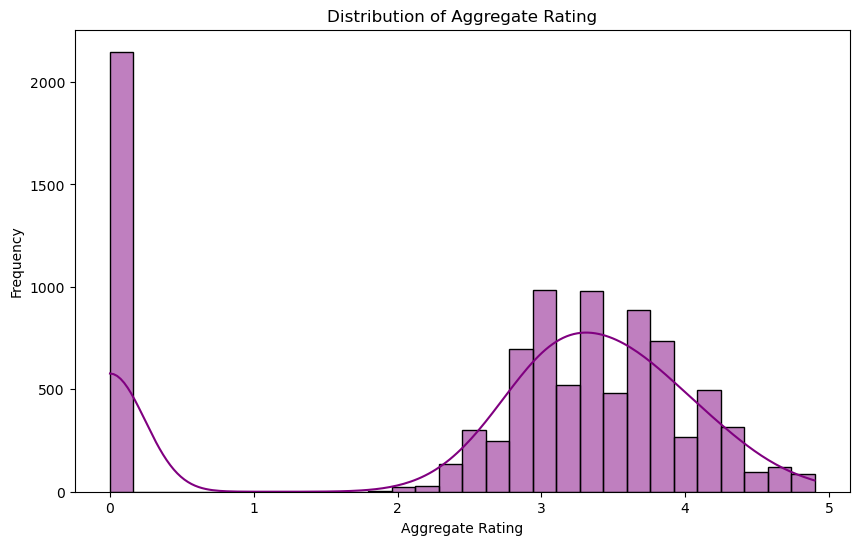

In [142]:
#Distribution of Aggregate Rating:
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['Aggregate rating'], bins=30, kde=True, color='purple')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

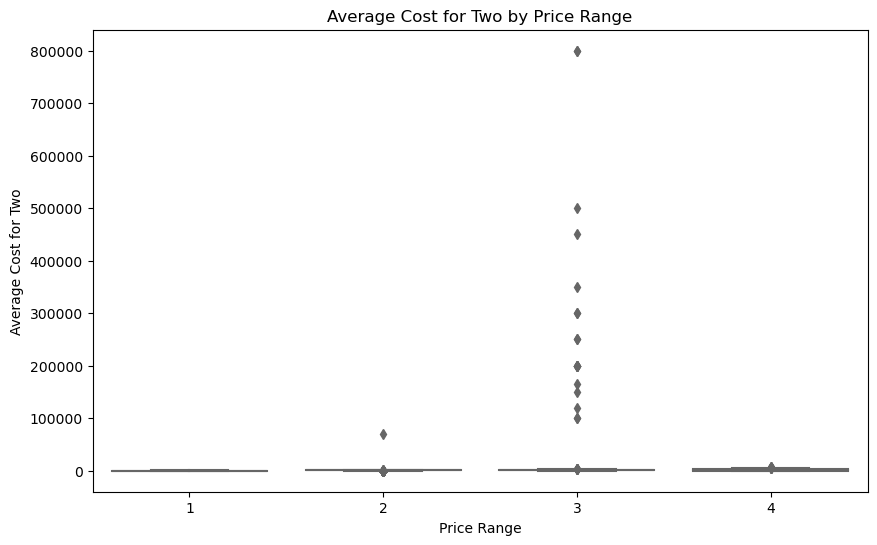

In [143]:
#Average Cost for Two by Price Range:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Average Cost for two', data=combined_data, palette='coolwarm')
plt.title('Average Cost for Two by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')
plt.show()

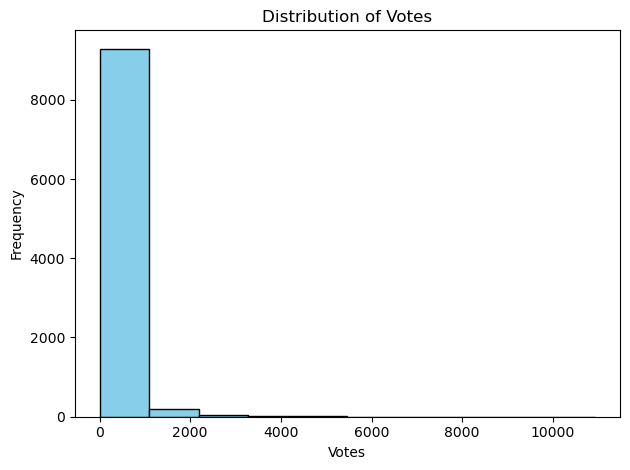

In [146]:
# Distribution of Votes
plt.hist(combined_data['Votes'], color='skyblue', edgecolor='black')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

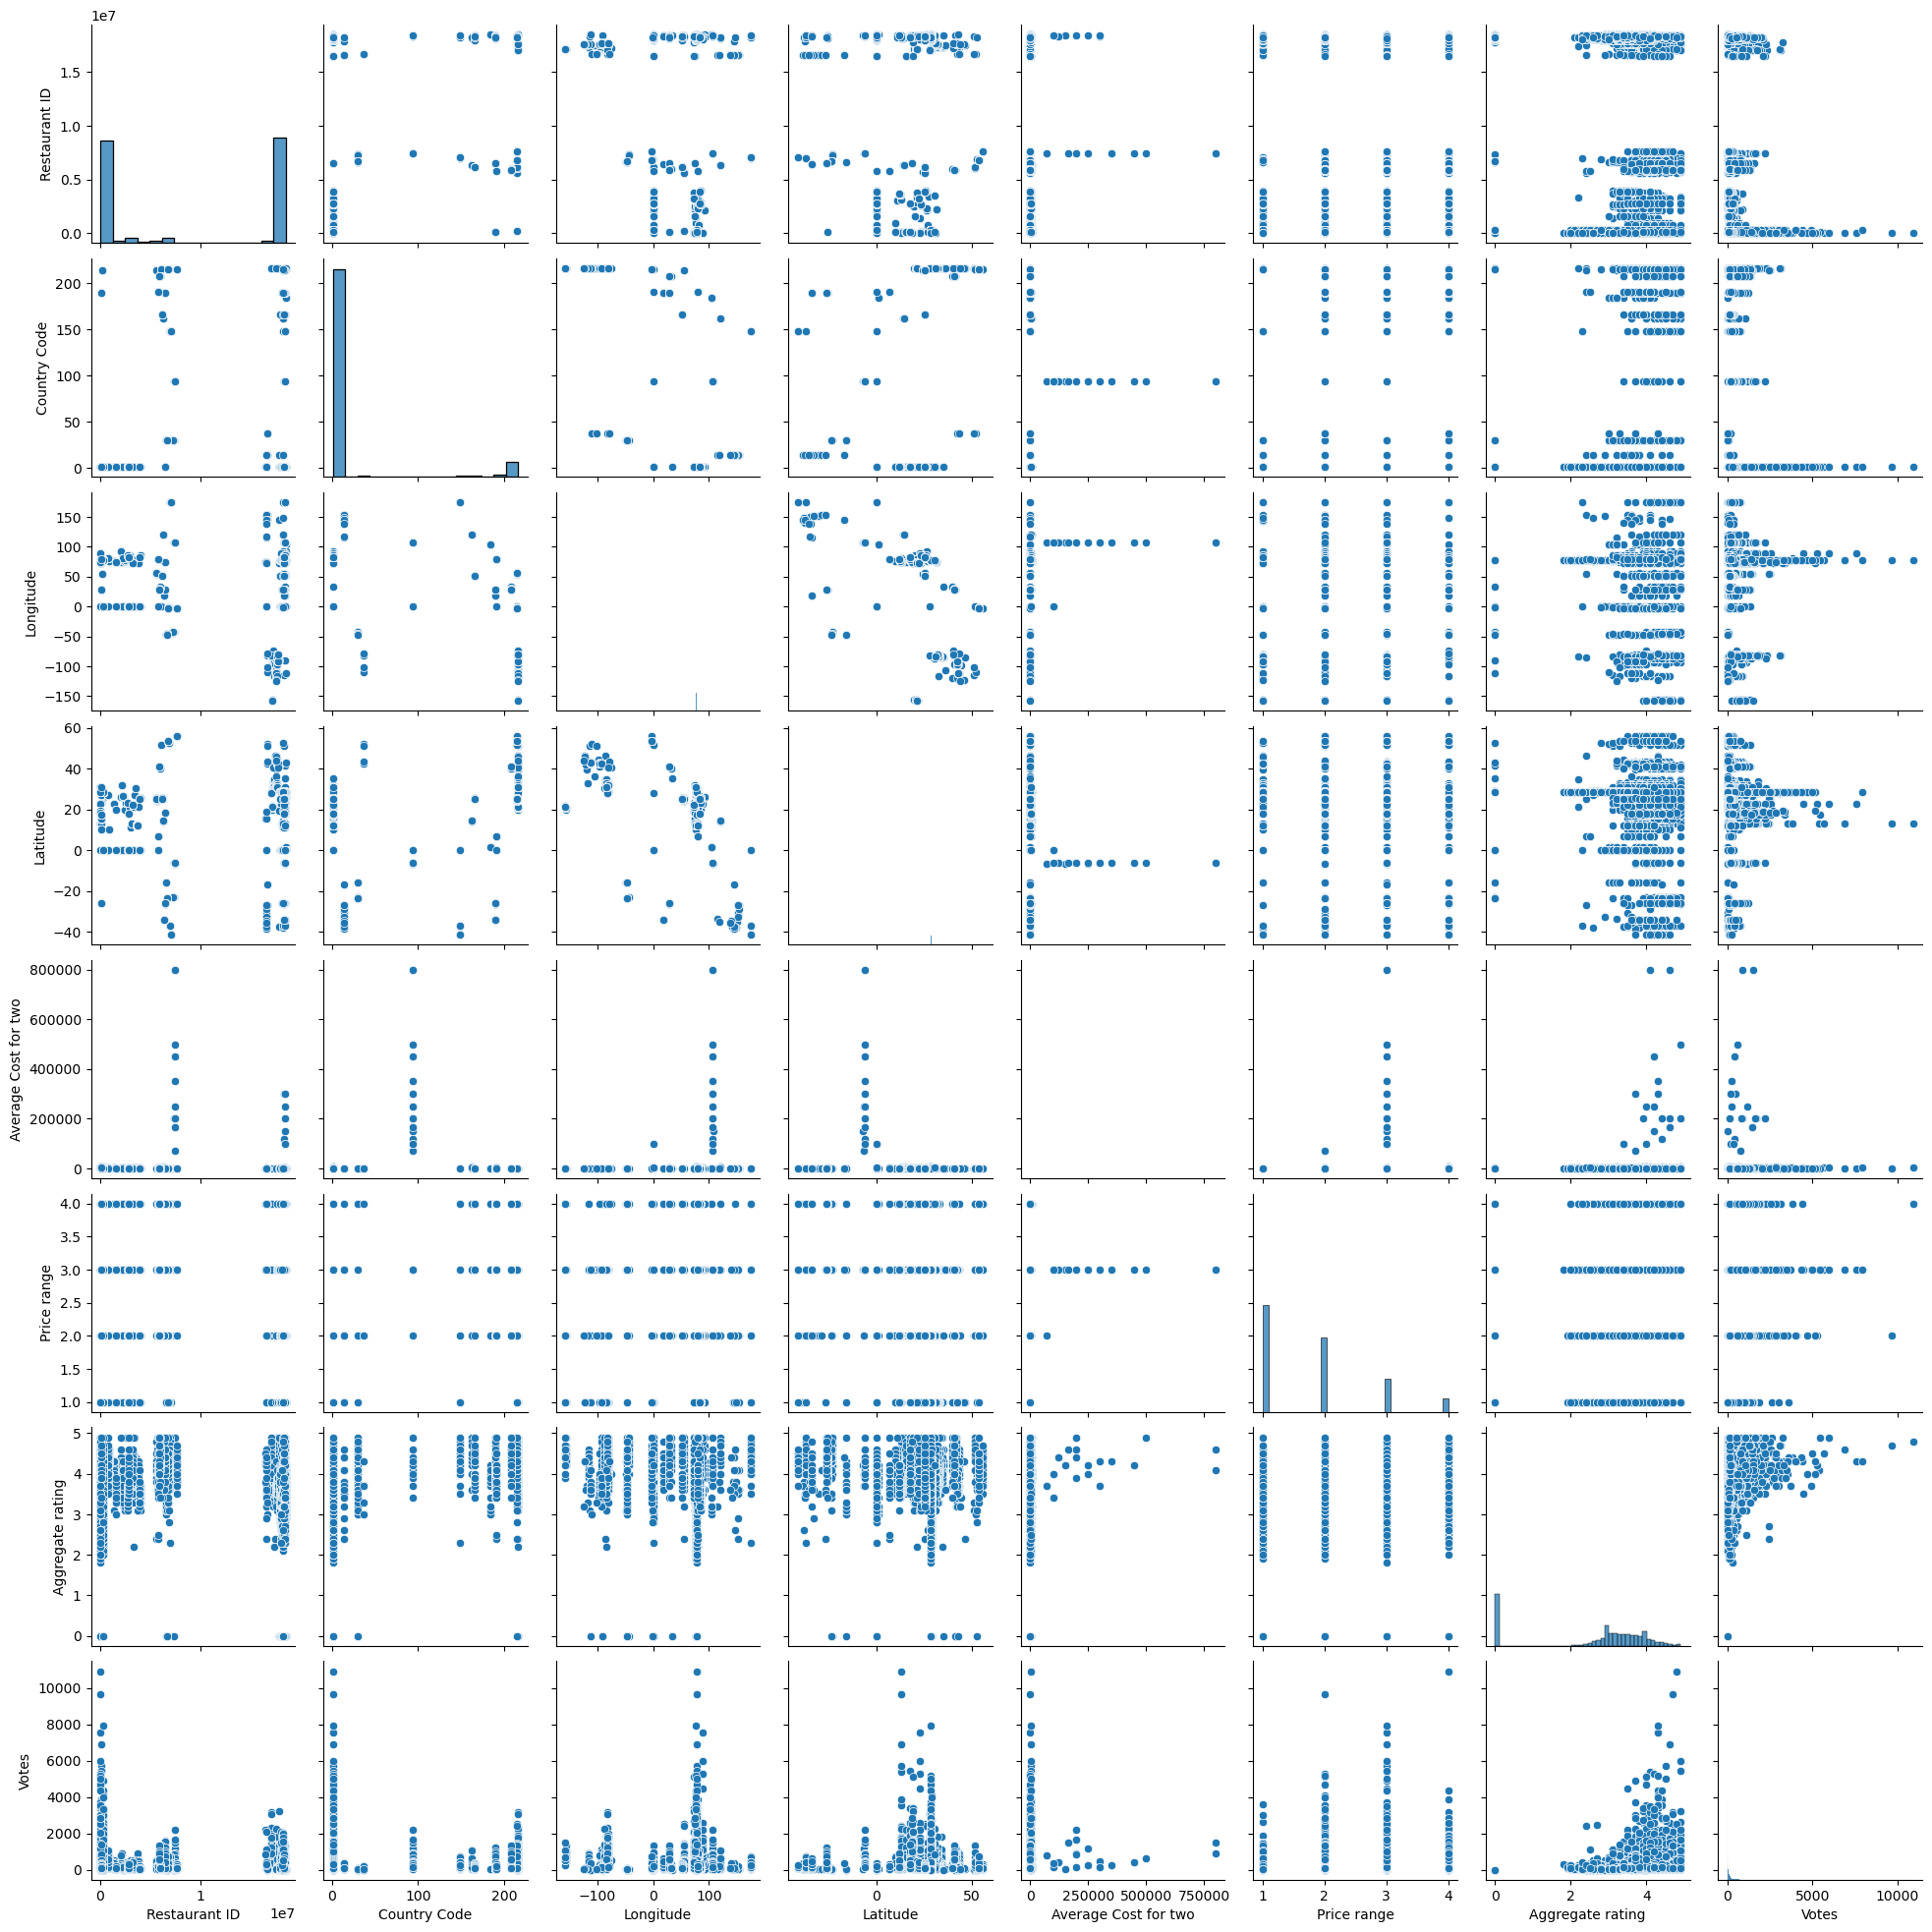

In [144]:
# Pairplot for numerical variables
sns.pairplot(combined_data)
plt.show()


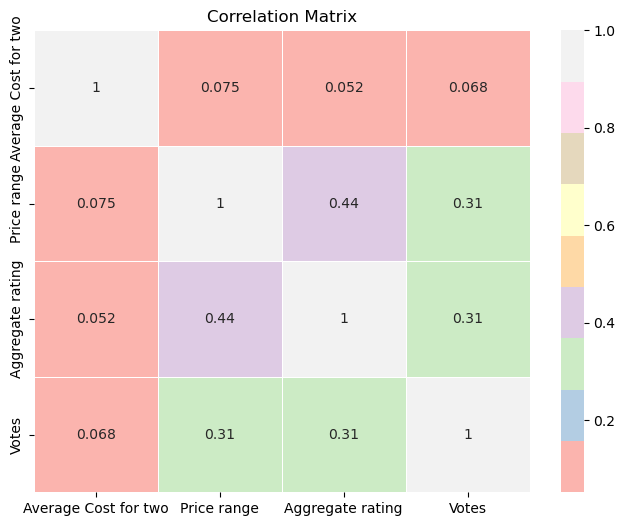

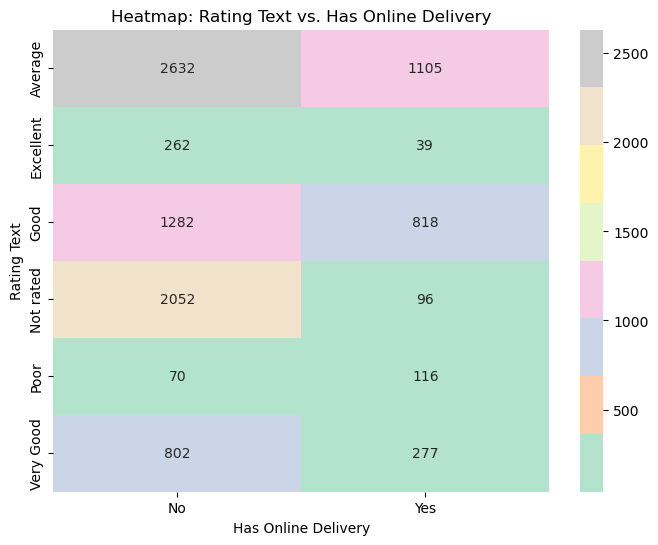

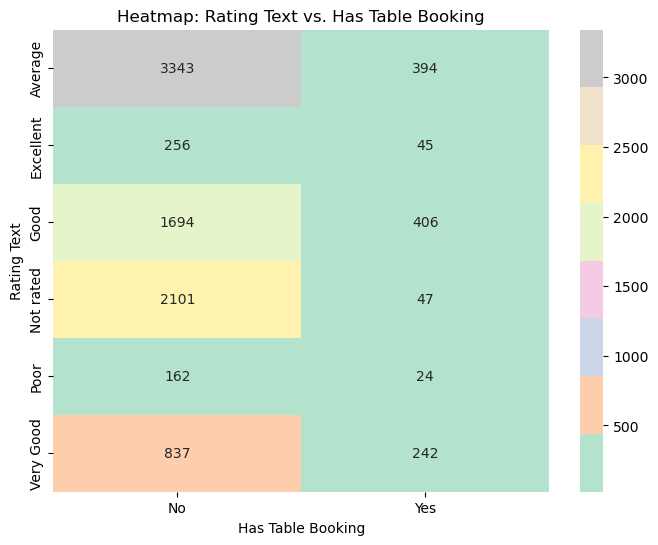

In [145]:
# Correlation matrix
correlation_matrix = combined_data[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Heatmap: Rating Text vs. Has Online Delivery
crosstab = pd.crosstab(combined_data['Rating text'], combined_data['Has Online delivery'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Pastel2')
plt.title('Heatmap: Rating Text vs. Has Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Rating Text')
plt.show()

# Heatmap: Rating Text vs. Has Table Booking
crosstab2 = pd.crosstab(combined_data['Rating text'], combined_data['Has Table booking'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab2, annot=True, fmt='d', cmap='Pastel2')
plt.title('Heatmap: Rating Text vs. Has Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Rating Text')
plt.show()

In [147]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode categorical columns
combined_data['Has Table booking'] = label_encoder.fit_transform(combined_data['Has Table booking'])
combined_data['Has Online delivery'] = label_encoder.fit_transform(combined_data['Has Online delivery'])
combined_data['Is delivering now'] = label_encoder.fit_transform(combined_data['Is delivering now'])
combined_data['Switch to order menu'] = label_encoder.fit_transform(combined_data['Switch to order menu'])
combined_data['Cuisines'] = label_encoder.fit_transform(combined_data['Cuisines'])
combined_data['City'] = label_encoder.fit_transform(combined_data['City'])
combined_data['Rating text'] = label_encoder.fit_transform(combined_data['Rating text'])
combined_data['Rating color'] = label_encoder.fit_transform(combined_data['Rating color'])
combined_data['Locality'] = label_encoder.fit_transform(combined_data['Locality'])
combined_data['Locality Verbose'] = label_encoder.fit_transform(combined_data['Locality Verbose'])
combined_data['Price range'] = label_encoder.fit_transform(combined_data['Price range'])

In [148]:
# Drop unnecessary columns
combined_data = combined_data.drop(['Restaurant Name', 'Address', 'Currency', 'Restaurant ID', 'Country'], axis=1)

In [149]:
from sklearn.model_selection import train_test_split

X_cost = combined_data.drop(['Average Cost for two'], axis=1)
y_cost = combined_data['Average Cost for two']

X_cost_train, X_cost_test, y_cost_train, y_cost_test = train_test_split(X_cost, y_cost, test_size=0.2, random_state=42)

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_cost_train_scaled = scaler.fit_transform(X_cost_train)
X_cost_test_scaled = scaler.transform(X_cost_test)

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_linear = linear_reg_model.predict(X_cost_test_scaled)

mse_linear = mean_squared_error(y_cost_test, y_cost_pred_linear)
mae_linear = mean_absolute_error(y_cost_test, y_cost_pred_linear)
r2_linear = r2_score(y_cost_test, y_cost_pred_linear)

cv_scores_linear = cross_val_score(linear_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_linear = np.sqrt(-cv_scores_linear)

print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"R-squared (R2) Score: {r2_linear:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_linear):.2f}")

Linear Regression Model:
Mean Squared Error (MSE): 372549196.50
Mean Absolute Error (MAE): 1889.01
R-squared (R2) Score: 0.02
Cross-Validated RMSE: 14426.53


In [152]:
from sklearn.linear_model import Ridge

ridge_reg_model = Ridge()
ridge_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_ridge = ridge_reg_model.predict(X_cost_test_scaled)

mse_ridge = mean_squared_error(y_cost_test, y_cost_pred_ridge)
mae_ridge = mean_absolute_error(y_cost_test, y_cost_pred_ridge)
r2_ridge = r2_score(y_cost_test, y_cost_pred_ridge)

cv_scores_ridge = cross_val_score(ridge_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_ridge = np.sqrt(-cv_scores_ridge)

print("Ridge Regression Model:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"R-squared (R2) Score: {r2_ridge:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_ridge):.2f}")

Ridge Regression Model:
Mean Squared Error (MSE): 372531332.38
Mean Absolute Error (MAE): 1885.52
R-squared (R2) Score: 0.02
Cross-Validated RMSE: 14425.62


In [154]:
from sklearn.ensemble import RandomForestRegressor

rf_reg_model = RandomForestRegressor()
rf_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_rf = rf_reg_model.predict(X_cost_test_scaled)

mse_rf = mean_squared_error(y_cost_test, y_cost_pred_rf)
mae_rf = mean_absolute_error(y_cost_test, y_cost_pred_rf)
r2_rf = r2_score(y_cost_test, y_cost_pred_rf)

cv_scores_rf = cross_val_score(rf_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_rf = np.sqrt(-cv_scores_rf)

print("Random Forest Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R2) Score: {r2_rf:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_rf):.2f}")

Random Forest Regressor Model:
Mean Squared Error (MSE): 184087256.02
Mean Absolute Error (MAE): 569.96
R-squared (R2) Score: 0.52
Cross-Validated RMSE: 8696.14


In [157]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
}

rf_reg_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_reg_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_cost_train_scaled, y_cost_train)

best_params = grid_search.best_params_

print("Best Hyperparameters for rf_reg_model:", best_params)

best_rf_reg_model = grid_search.best_estimator_

y_cost_pred_best_rf = best_rf_reg_model.predict(X_cost_test_scaled)

mse_rf_best = mean_squared_error(y_cost_test, y_cost_pred_best_rf)
mae_rf_best = mean_absolute_error(y_cost_test, y_cost_pred_best_rf)
r2_rf_best = r2_score(y_cost_test, y_cost_pred_best_rf)

print("Best RandomForestRegressor Model:")
print(f"Mean Squared Error (MSE): {mse_rf_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf_best:.2f}")
print(f"R-squared (R2) Score: {r2_rf_best:.2f}")

Best Hyperparameters for rf_reg_model: {'max_depth': 3, 'n_estimators': 50}
Best RandomForestRegressor Model:
Mean Squared Error (MSE): 174013162.96
Mean Absolute Error (MAE): 628.83
R-squared (R2) Score: 0.54


In [158]:
sample_data1 = pd.DataFrame({
    'Country Code': [162],
    'City': [23],
    'Locality': [35],
    'Locality Verbose': [89],
    'Longitude': [131.02235],
    'Latitude': [4.565443],
    'Cuisines': [881],
    'Has Table booking': [1],
    'Has Online delivery': [1],
    'Is delivering now': [0],
    'Switch to order menu': [1],
    'Price range': [1],
    'Aggregate rating': [2.8],
    'Rating color': [0],
    'Rating text': [4],
    'Votes': [714]
})

sample_data1_scaled = scaler.transform(sample_data1)

# Predictions
sample_pred1 = best_rf_reg_model.predict(sample_data1_scaled)

print("Predicted Average Cost for Two (Sample Data 1):", sample_pred1[0])

Predicted Average Cost for Two (Sample Data 1): 999.2415069519406


# Part Two - Predicting Price Range


In [171]:
X_price_range = combined_data.drop(['Price range'], axis=1)
y_price_range = combined_data['Price range']

X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price_range, y_price_range, test_size=0.2, random_state=42)

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_price_train, y_price_train)

y_price_pred_logistic = logistic_reg_model.predict(X_price_test)

accuracy_logistic = accuracy_score(y_price_test, y_price_pred_logistic)
classification_rep_logistic = classification_report(y_price_test, y_price_pred_logistic)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Model:
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       907
           1       0.71      0.82      0.76       618
           2       0.57      0.50      0.53       266
           3       0.12      0.06      0.08       120

    accuracy                           0.76      1911
   macro avg       0.57      0.57      0.57      1911
weighted avg       0.74      0.76      0.75      1911



In [173]:
input_data = (162,23,35,89,131.02235,4.565443,881,1340,1,1,0,1,2.8,0,4,714)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logistic_reg_model.predict(input_data_reshaped)

print(prediction)
print('Predicted Price Range ',prediction[0])

[2]
Predicted Price Range  2
